### Kulak & Grondin Example 8.2
This example is from "*Limit States Design in Structural Steel*", Ninth Edition, CISC, by Kulak and Grondin.
It illustrates using the fictitious load method to determine second-order effects (i.e., the $P-\Delta$ method).

In [1]:
from salib import showImage
import salib.nbloader
import Frame2D_v03 as f2d

![Frame](KG82.d/KG82a.jpg)
In order account for initial out-of-straightness and partial yielding, *notional* lateral loads equal to 0.005 times the factored gravity loads contributed by each level are added to each level (CSA S16-09 8.4.1).  At node **H** that will be $45 \times (10+10.5+10) \times 0.005 = 6.9\ kN$ and at node **G** it is $55 \times (10+10.5+10) \times 0.005 = 8.4\ kN$.  These notional loads will be added to the forces already there.

In [2]:
frame = f2d.Frame2D()
frame.read_data('KG82')   # read the CSV files in directory 'KG82.d'

In [3]:
frame.doall()


Time to solve = 0.01 sec.

ndof = 36, nfree = 26, nconstraints = 10



Nodes:

Node          X         Y  Constraints  DOF #s
----      -----     -----  -----------  ------
A         10000         0  FX,FY,MZ     26,27,28
B         10000      6500               0,1,2
C         10000     12000               3,4,5
D         20500         0  FX,FY,MZ     29,30,31
E         20500      6500               6,7,8
F         20500     12000               9,10,11
G         30500      6500               12,13,14
H         30500     12000               15,16,17
I         30500         0  FX,FY        32,33,18
J             0         0  FX,FY        34,35,19
K             0      6500               20,21,22
L             0     12000               23,24,25



Members:

Member   Node-J  Node-K    Length       dcx       dcy  Size                Ix           A  Releases
------   ------  ------    ------   -------   -------  --------      --------       -----  --------
AB       A       B         6500.0  

The above are the results of a first-order analysis and should be compared with those shown in the following figure from Kulak & Grondin:

![Frame](KG82.d/KG82b.jpg)

### $P-\Delta$ Analysis

In [4]:
frame.doall(pdelta=True,showinput=False)

iter=1, max D=40.0705905519, max chg=5.37754613514, max % chg=13.4201818867
iter=2, max D=40.9144007916, max chg=0.843834955693, max % chg=2.06243997069
iter=3, max D=41.0471570086, max chg=0.132760379933, max % chg=0.323433800557
iter=4, max D=41.0680614969, max chg=0.0209051473164, max % chg=0.0509036622484
iter=5, max D=41.0713541602, max chg=0.00329276702251, max % chg=0.00801718640606

Time to solve = 0.01 sec.



Node Displacements:

Node        DX         DY      Rotation
----      ------     ------   ---------
A          0.000      0.000   0.0000000
B         26.392     -2.614  -0.0075457
C         41.059     -3.622  -0.0075611
D          0.000      0.000   0.0000000
E         26.745     -2.803   0.0027204
F         40.706     -3.858   0.0055544
G         26.889     -1.321  -0.0032662
H         40.801     -1.824  -0.0021613
I          0.000      0.000  -0.0045720
J          0.000      0.000  -0.0044338
K         26.378     -1.321  -0.0033071
L         41.071     -1.824  -0.0023

The above are the results of a second-order ($P-\Delta$) analysis and should be compared with the following figure from Kulak & Grondin:

![Final P-Delta Result](KG82.d/KG82c.jpg)

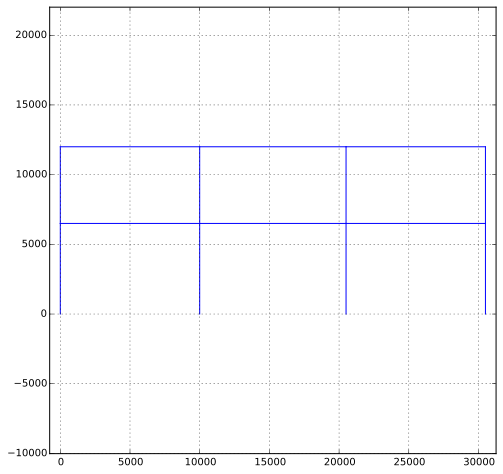

In [5]:
%matplotlib inline
frame.plot()